Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [1]:
import retinoto_py as fovea
args = fovea.Params(do_fovea=True, model_name='convnext_base', 
                    # n_train_stop=2_000, n_val_stop=1_000)
                    # n_train_stop=200_000, n_val_stop=10_000, in_memory=True)
                 #    n_train_stop=0, n_val_stop=0, in_memory=False)
                    n_train_stop=0, n_val_stop=0, in_memory=True)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	 user laurent	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 2018 has been set.


Params(image_size=224, do_mask=False, do_fovea=True, rs_min=0.0, rs_max=-5.0, padding_mode='zeros', seed=2018, batch_size=256, num_workers=0, in_memory=True, model_name='convnext_base', do_scratch=False, num_epochs=20, n_train_stop=0, n_val_stop=0, lr=3e-06, delta1=0.05, delta2=0.01, weight_decay=0.02, label_smoothing=0.03, shuffle=True, verbose=True)

In [2]:
fovea.all_cn_model_names

['convnext_tiny', 'convnext_base', 'convnext_large']

In [3]:
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning)
# warnings.filterwarnings(
#     "ignore",
#     message=r"iCCP: profile 'ICC Profile'",
#     category=UserWarning,
#     module='PIL.PngImagePlugin'
# )

# testing each network on the validation dataset

In [4]:
%ls -lh "cached_data/33_"*

-rw-r--r--@ 1 laurent  staff   3,7K  3 déc.  13:56 cached_data/33_fovea_model_name=convnext_base_dataset=bbox.json
-rw-r--r--@ 1 laurent  staff   338M  3 déc.  13:56 cached_data/33_fovea_model_name=convnext_base_dataset=bbox.pth


In [5]:
# %rm "cached_data/33_fovea_model_name=convnext_base_dataset=bbox"*  # FORCING RECOMPUTE
# %rm "cached_data/33_fovea_model_name=convnext_base_dataset=bbox.lock"  # FORCING RECOMPUTE
# %rm cached_data/33_fovea_model_*  # FORCING RECOMPUTE
# %rm cached_data/33_fovea_model_*.lock  # FORCING RECOMPUTE
model_name = args.model_name
# do_full_training
for dataset in ['bbox']: # fovea.all_datasets:
    name = f'33_fovea_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

Load JSON from pre-trained resnet cached_data/33_fovea_model_name=convnext_base_dataset=bbox.json
cached_data/33_fovea_model_name=convnext_base_dataset=bbox.pth: accuracy = 0.777
..................................................


## Model comparison

In [6]:
# model_name = args.model_name
# for dataset in fovea.all_datasets:
#     results = fovea.pd.read_json(args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}.json')
#     print(model_name, dataset, results.tail(1)['acc_val'])

In [18]:
model_name = args.model_name
# for dataset in fovea.all_datasets:
for dataset in ['bbox']: # fovea.all_datasets:
    results = fovea.pd.read_json(args.data_cache / f'33_fovea_model_name={model_name}_dataset={dataset}.json')
    print(model_name, dataset, results.tail(1)['acc_val'])

convnext_base bbox 19    0.777518
Name: acc_val, dtype: float64


In [19]:

len(results)

20

In [20]:
results.tail(1)

,epoch,i_image,total_image,loss_train,acc_train,acc_val,time
19,19,615168,12303360,0.590496,0.925464,0.777518,182941.955385


In [21]:
results.tail(1)['acc_val']

19    0.777518
Name: acc_val, dtype: float64

In [23]:
# results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
# results_13

In [12]:
%ls cached_data/20*

zsh:1: no matches found: cached_data/20*


In [13]:
model_name, dataset

('convnext_base', 'full')

In [14]:
# results_20 = fovea.pd.read_json(args.data_cache / '20_model_name={model_name}_dataset={dataset}.json')
# results_20

In [15]:
# for dataset in fovea.all_datasets:
#     name = f'20_model_name={model_name}_dataset={dataset}'
#     model_filename, json_filename = fovea.do_learning(args, dataset, name)
#     results = fovea.pd.read_json(json_filename)
#     print(results)

## Plot learning evolution

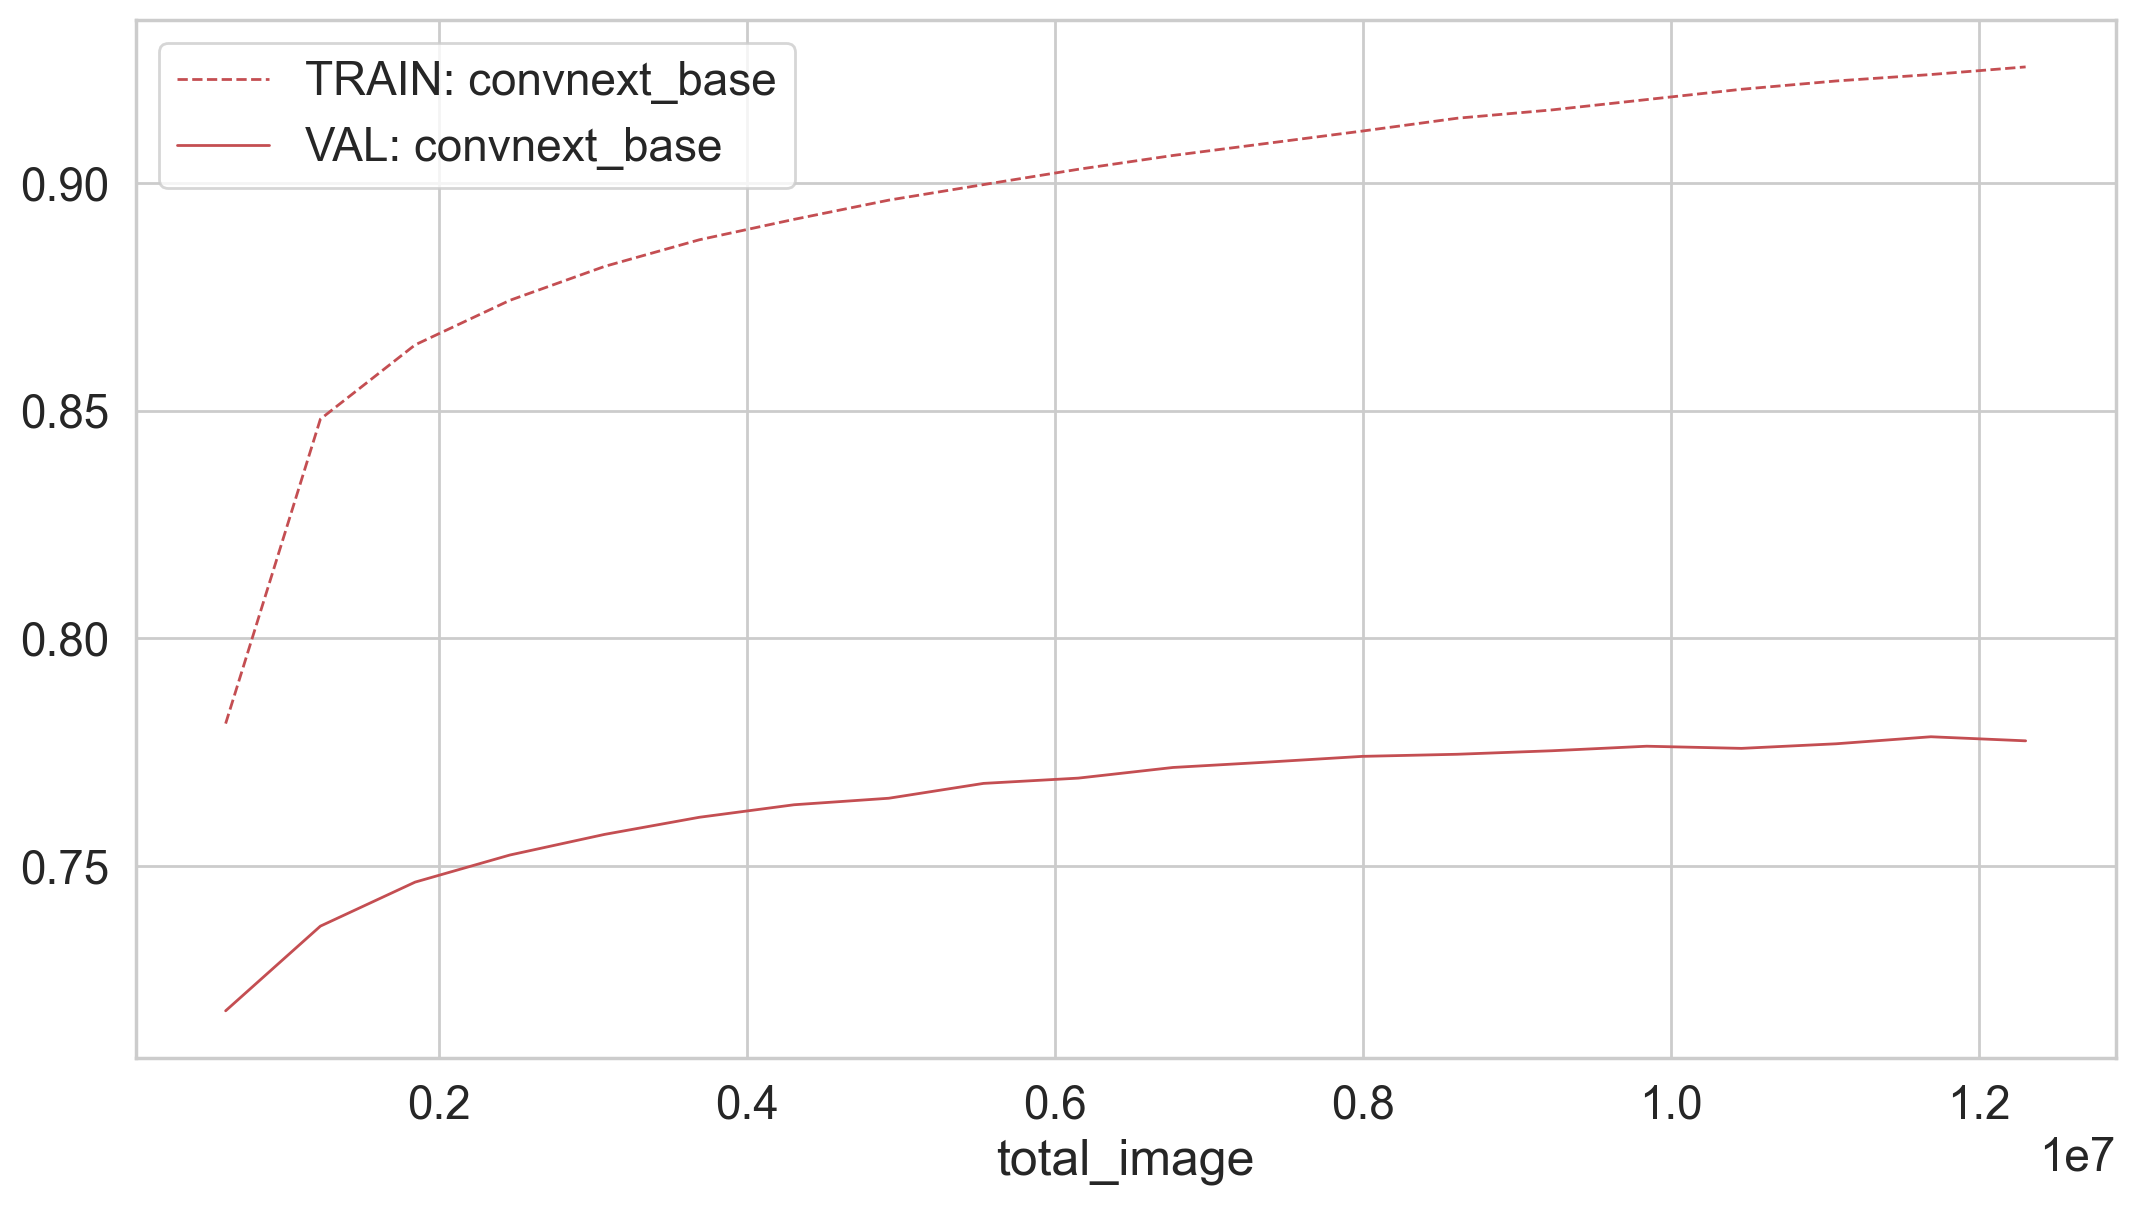

In [16]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']:#fovea.all_datasets:
    color = 'r'
    lw = 1

    # name = f'33_fovea_model_name={model_name}_dataset={dataset}'
    # cached_data/33_fovea_model_name=resnet101_dataset=bbox.json
    json_filename = args.data_cache / f'33_fovea_model_name={model_name}_dataset={dataset}.json'
    # model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    # df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [17]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,acc_val,time
0,0,615168,615168,1.203572,0.781305,0.718252,9142.823557
1,1,615168,1230336,0.875897,0.848142,0.736838,18281.599445
2,2,615168,1845504,0.811994,0.864445,0.746504,27413.773697
3,3,615168,2460672,0.773544,0.874221,0.752451,36554.460357
4,4,615168,3075840,0.745903,0.881665,0.756979,45695.880429
5,5,615168,3691008,0.724733,0.887512,0.760736,54833.985997
6,6,615168,4306176,0.708025,0.891995,0.763485,63975.054511
7,7,615168,4921344,0.692292,0.896217,0.764916,73116.500268
8,8,615168,5536512,0.679182,0.899627,0.768175,82268.994613
9,9,615168,6151680,0.668300,0.902987,0.769332,91415.433386
